In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coca_cola=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
coca_cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:>

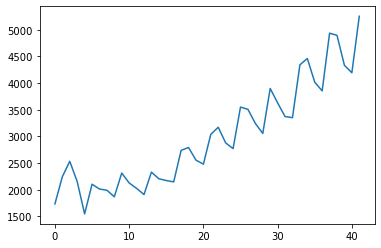

In [4]:
coca_cola.Sales.plot()

In [5]:
coca_cola.shape

(42, 2)

In [6]:
coca_cola.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


C:\Users\suhas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

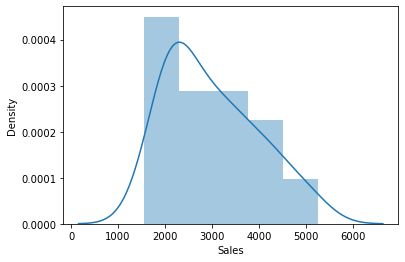

In [7]:
sns.distplot(coca_cola['Sales'])

In [8]:
coca_cola['Quarters']=0
coca_cola['Year']=0
for i in range(42):
    p=coca_cola['Quarter'][i]
    coca_cola['Quarters'][i]=p[0:2]
    coca_cola['Year'][i]=p[3:5]
    
coca_cola.head()

<ipython-input-8-9fe3e53681ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca_cola['Quarters'][i]=p[0:2]
C:\Users\suhas\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-8-9fe3e53681ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca_cola['Year'][i]=p[3:5]


,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [9]:
t=pd.DataFrame(pd.get_dummies(coca_cola['Quarters']))

In [10]:
coca_cola=pd.concat([coca_cola,t],axis=1)

In [11]:
coca_cola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [12]:
coca_cola['log_sales']=np.log(coca_cola['Sales'])

In [13]:
coca_cola['time']=range(1,43)

In [14]:
coca_cola['time_sqr']=coca_cola['time']*coca_cola['time']

In [15]:
coca_cola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,log_sales,time,time_sqr
0,Q1_86,1734.827000,Q1,86,1,0,0,0,7.458663,1,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,7.716443,2,4
2,Q3_86,2533.804993,Q3,86,0,0,1,0,7.837477,3,9
3,Q4_86,2154.962997,Q4,86,0,0,0,1,7.675529,4,16
4,Q1_87,1547.818996,Q1,87,1,0,0,0,7.344602,5,25


In [16]:
train=coca_cola.head(30)
test=coca_cola.tail(12)

# model driven 

In [17]:
import statsmodels.formula.api as smf 


In [18]:
#Linear Model

linear_model = smf.ols('Sales~time',data=coca_cola).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['time'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

449.79962261229645

In [19]:
#Exponential

Exp = smf.ols('log_sales~time',data=coca_cola).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['time'])))

In [20]:
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

417.5608283749833

In [21]:
#Quadratic 

Quad = smf.ols('Sales~time+time_sqr',data=coca_cola).fit()
pred_Quad = pd.Series(Quad.predict(test[["time","time_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

394.75561592701087

In [22]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=coca_cola).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1305.6638874921075

In [23]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~time+time_sqr',data=coca_cola).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['time','time_sqr','Q1','Q2','Q3','Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

394.75561592701087

In [24]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = coca_cola).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1435.5011310008917

In [25]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~time+Q1+Q2+Q3+Q4',data = coca_cola).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.15056883930023

In [26]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,172.150569
2,rmse_Quad,394.755616
4,rmse_add_sea_quad,394.755616
1,rmse_Exp,417.560828
0,rmse_linear,449.799623
3,rmse_add_sea,1305.663887
5,rmse_Mult_sea,1435.501131


In [27]:
#predict on the whole data

In [28]:
model_full = smf.ols('log_sales~time+Q1+Q2+Q3+Q4',data = coca_cola).fit()
pred_full = pd.Series(model_full.predict(coca_cola))
pred_fin=np.exp(pred_full)

In [29]:
coca_cola["Predicted_sales"]=pred_fin
coca_cola.tail()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,log_sales,time,time_sqr,Predicted_sales
37,Q2_95,4936.0,Q2,95,0,1,0,0,8.504311,38,1444,4673.966165
38,Q3_95,4895.0,Q3,95,0,0,1,0,8.495970,39,1521,4634.780289
39,Q4_95,4333.0,Q4,95,0,0,0,1,8.374015,40,1600,4278.124557
40,Q1_96,4194.0,Q1,96,1,0,0,0,8.341410,41,1681,4047.719050
41,Q2_96,5253.0,Q2,96,0,1,0,0,8.566555,42,1764,5148.351104


# Conclusion:
By looking at the above models, Multiplicative Additive Seasonality has the lowest Root Mean Square Error. Hence, we use the same model to predict the sales.